<a href="https://colab.research.google.com/github/harkpun/Bike-Sharing-Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* #### Date : year-month-day
* #### Rented Bike count - Count of bikes rented at each hour
* #### Hour - Hour of he day
* #### Temperature-Temperature in Celsius
* #### Humidity - %
* #### Windspeed - m/s
* #### Visibility - 10m
* #### Dew point temperature - Celsius
* #### Solar radiation - MJ/m2
* #### Rainfall - mm
* #### Snowfall - cm
* #### Seasons - Winter, Spring, Summer, Autumn
* #### Holiday - Holiday/No holiday
* #### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Regression/SeoulBikeData.csv', encoding= 'unicode_escape')
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
5132,02/07/2018,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes
3475,24/04/2018,1580,19,13.3,37,1.2,2000,-1.1,0.12,0.0,0.0,Spring,No Holiday,Yes
20,01/12/2017,426,20,-0.3,79,1.5,1913,-3.5,0.00,0.0,0.0,Winter,No Holiday,Yes
8164,06/11/2018,0,4,9.1,81,0.0,493,6.0,0.00,0.0,0.0,Autumn,No Holiday,No
5035,28/06/2018,944,19,20.9,97,1.0,1747,20.3,0.19,0.0,0.0,Summer,No Holiday,Yes


In [4]:
df.shape

(8760, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
df.describe(include='object')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
df.Date = pd.to_datetime(df.Date)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week Day'] = df['Date'].dt.day_name()

df.drop('Date', axis=1, inplace=True)

In [11]:
# data conversion

def hour(x):
    ''' converting hours into session like mornig, Noon, Night etc.
        transforming data numeric to category. 
    '''
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make category
df['Session'] = df['Hour'].apply(hour)

# droping columns from dataset
df.drop('Hour', axis=1, inplace=True)

In [12]:
# function to get information about data_type, null_count, unique_count in thr dataframe format

def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
Rented Bike Count,int64,0,2166
Temperature(°C),float64,0,546
Humidity(%),int64,0,90
Wind speed (m/s),float64,0,65
Visibility (10m),int64,0,1789
Dew point temperature(°C),float64,0,556
Solar Radiation (MJ/m2),float64,0,345
Rainfall(mm),float64,0,61
Snowfall (cm),float64,0,51
Seasons,object,0,4


In [13]:
#sepreting numerical and categorical data

numeric_features = df.describe().columns
category_features = df.describe(include='object').columns

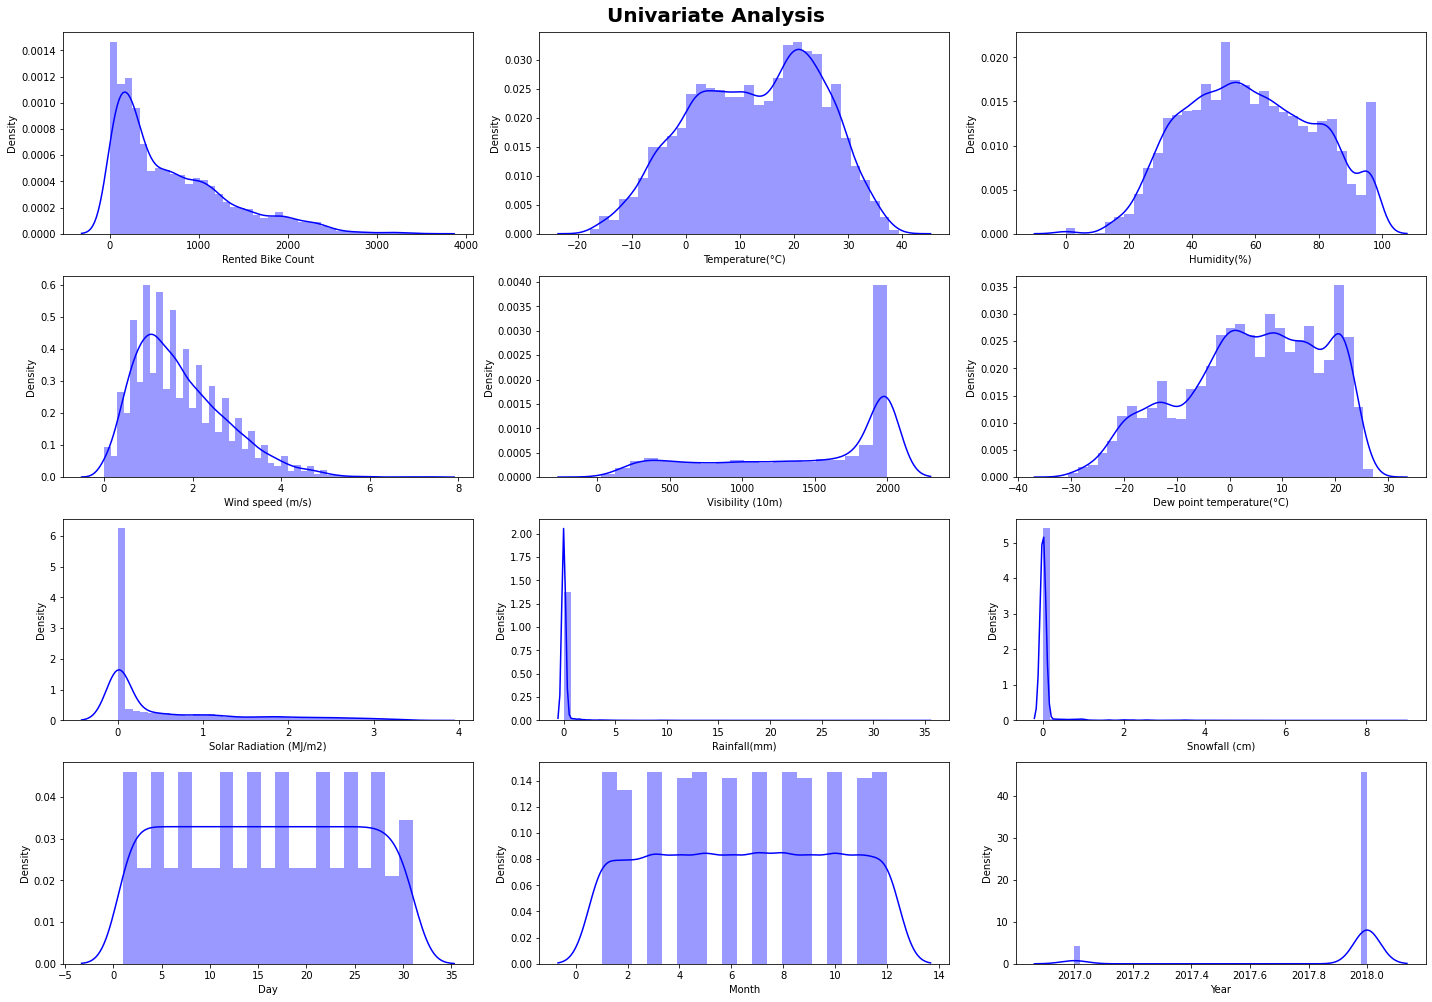

In [14]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.distplot(x=df[numeric_features[i]], kde=True, color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

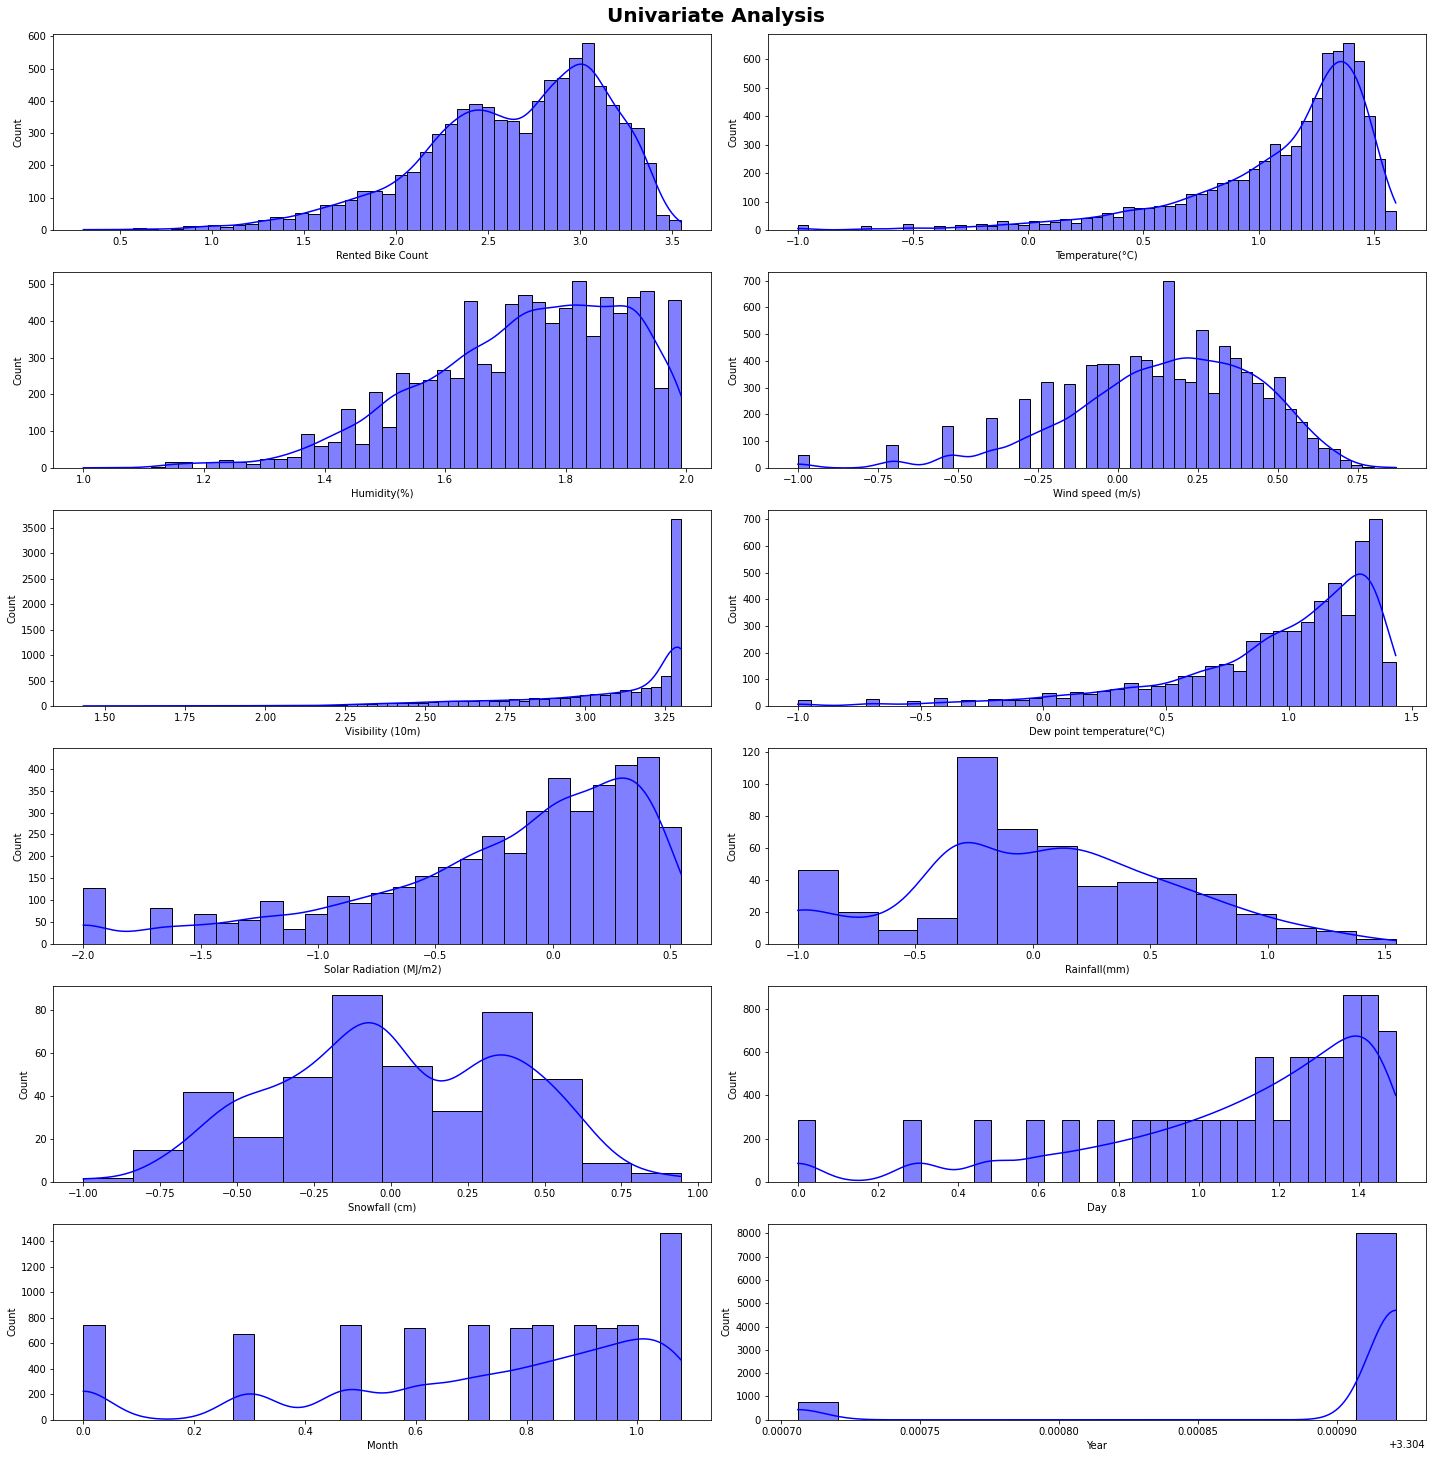

In [15]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 2, i+1)
    sns.histplot(x=np.log10(df[numeric_features[i]]), kde=True, color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

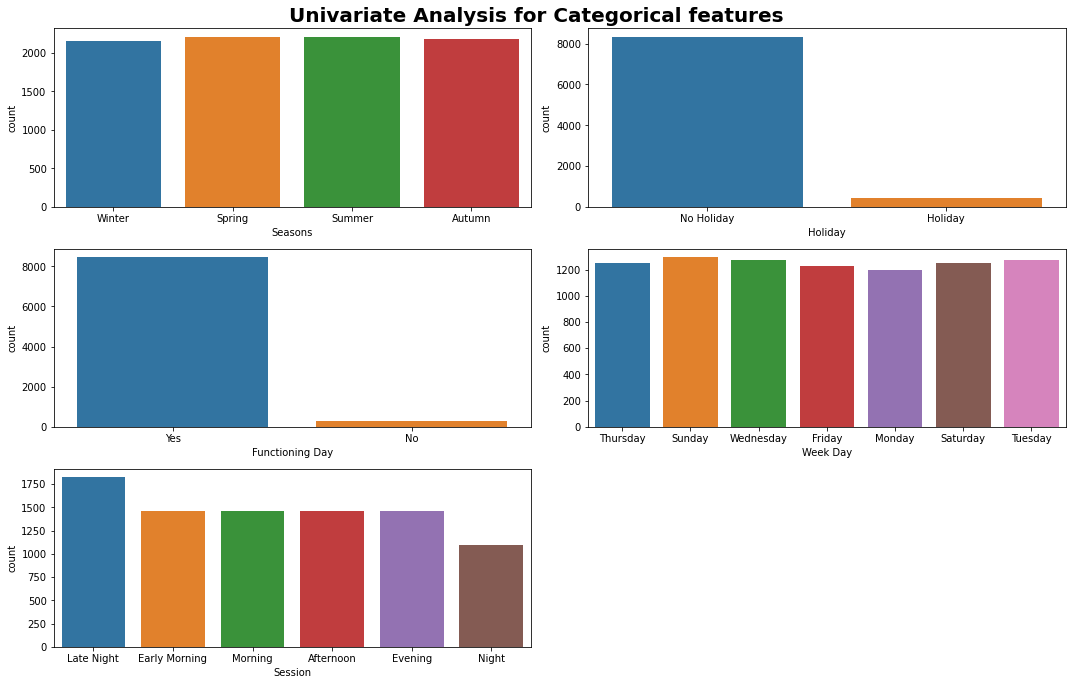

In [16]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis for Categorical features', fontsize=20, fontweight='bold', y=1.01)

for i in range(len(category_features)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[category_features[i]], data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

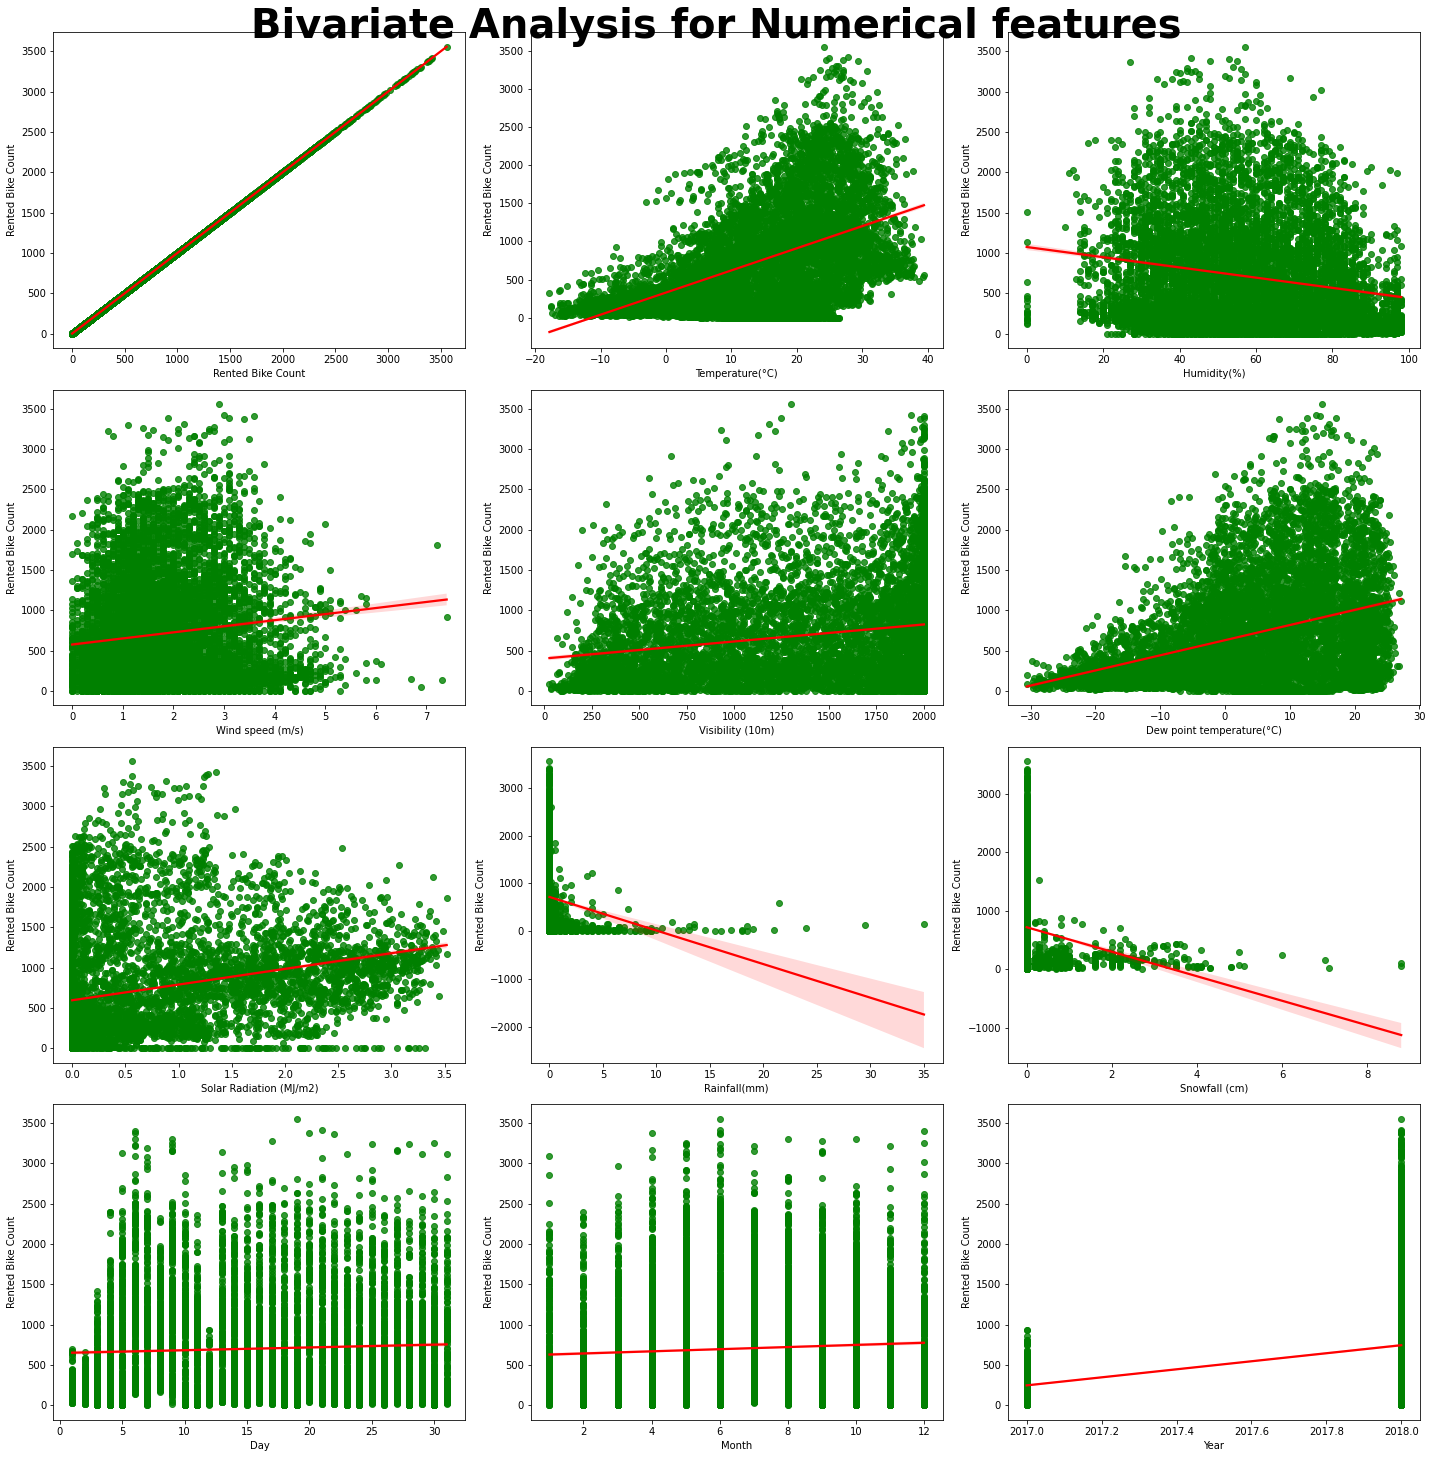

In [17]:
plt.figure(figsize=(20,20))
plt.suptitle('Bivariate Analysis for Numerical features', fontsize=40, fontweight='bold', y=1.01)

for i in range(len(numeric_features)):
    plt.subplot(4, 3, i+1)
    sns.regplot(x=df[numeric_features[i]], y=df['Rented Bike Count'], line_kws={'color':'red'}, scatter_kws={"color": 'green'})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

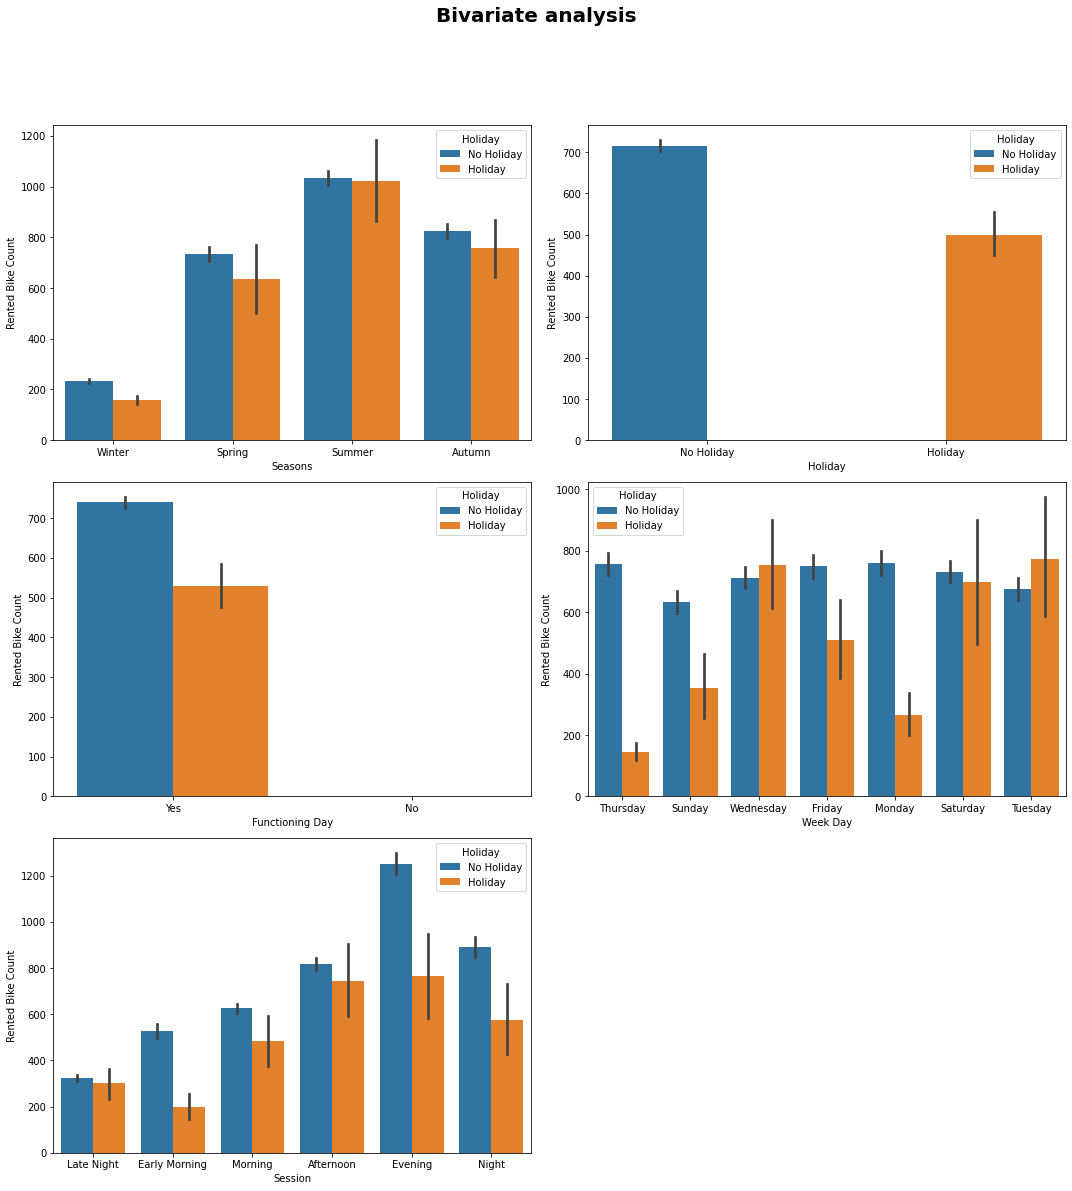

In [18]:
plt.figure(figsize=(15,15))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.1)

for i in range(len(category_features)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x=df[category_features[i]], y=df['Rented Bike Count'], hue='Holiday', data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

In [19]:
df.nunique()

Rented Bike Count            2166
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Day                            31
Month                          12
Year                            2
Week Day                        7
Session                         6
dtype: int64

In [20]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)